# Airbnb Amsterdam - Eindopdracht VA

## Import libraries

In [42]:
import pandas as pd
import numpy as np
import requests
import json
import math
import geopandas as gpd
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from folium import Choropleth, Marker
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime

## Woningmarkt data inladen via API 
https://data.amsterdam.nl/datasets/03G1QUEsOQ2Xkw/woningmarkt-amsterdam/

In [168]:
# url = 'https://api.data.amsterdam.nl/dcatd/datasets/03G1QUEsOQ2Xkw/purls/5'
# s = requests.get(url).content
# xl = pd.ExcelFile(s)
# xl.sheet_names

['2022_jaarboek_stad']

In [169]:
# woz_df = xl.parse('2022_jaarboek_stad')

In [45]:
#woz_df

## Amsterdam airbnb data inladen via Kaggle API
https://www.kaggle.com/datasets/erikbruin/airbnb-amsterdam

In [46]:
#!pip install kaggle

In [47]:
# import kaggle
# from kaggle.api.kaggle_api_extended import KaggleApi

In [48]:
# api = KaggleApi()
# api.authenticate()

# print("Succesfully connected to the Kaggle API!")

In [49]:
# api.dataset_download_file("erikbruin/airbnb-amsterdam",
# file_name="calendar.csv")

# api.dataset_download_file("erikbruin/airbnb-amsterdam",
# file_name="listings.csv")

# api.dataset_download_file("erikbruin/airbnb-amsterdam",
# file_name="listings_details.csv")

# api.dataset_download_file("erikbruin/airbnb-amsterdam",
# file_name="neighbourhoods.csv")

# api.dataset_download_file("erikbruin/airbnb-amsterdam",
# file_name="neighbourhoods.geojson")

# api.dataset_download_file("erikbruin/airbnb-amsterdam",
# file_name="reviews.csv")

# api.dataset_download_file("erikbruin/airbnb-amsterdam",
# file_name="reviews_details.csv")

In [50]:
# #unpack zipped files
# import os, zipfile

# dir_name = os.getcwd()
# extension = '.zip'

# for item in os.listdir(dir_name): # loop through items in dir
#     if item.endswith(extension): # check for ".zip" extension
#         file_name = os.path.abspath(item) # get full path of files
#         zip_ref = zipfile.ZipFile(file_name) # create zipfile object
#         zip_ref.extractall(dir_name) # extract file to dir
#         zip_ref.close() # close file
#         os.remove(file_name) # delete zipped file

In [70]:
# #make a df from each file
# calendar_df = pd.read_csv('calendar.csv')
# listings_df = pd.read_csv('listings.csv')
# listings_details_df = pd.read_csv('listings_details.csv')
# neighbourhoods_df = pd.read_csv('neighbourhoods.csv')
# neighbourhoods_geoj = gpd.read_file('neighbourhoods.geojson')
# reviews_df = pd.read_csv('reviews.csv')
# reviews_details_df = pd.read_csv('reviews_details.csv')

In [71]:
apartments = listings_df[['latitude','longitude','room_type']]

In [72]:
price = listings_df.groupby('neighbourhood').price.mean()

In [73]:
price.head()

neighbourhood
Bijlmer-Centrum            91.216216
Bijlmer-Oost              101.604167
Bos en Lommer             116.996507
Buitenveldert - Zuidas    153.087786
Centrum-Oost              189.376301
Name: price, dtype: float64

In [74]:
neighbourhoods_geoj.set_index('neighbourhood', inplace=True)

In [75]:
neighbourhoods_geoj.head()

,neighbourhood_group,geometry
neighbourhood,,
Bijlmer-Oost,None,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4..."
Noord-Oost,None,"MULTIPOLYGON Z (((5.07916 52.38865 42.95663, 5..."
Noord-West,None,"MULTIPOLYGON Z (((4.93072 52.41161 42.91539, 4..."
Oud-Noord,None,"MULTIPOLYGON Z (((4.95242 52.38983 42.95411, 4..."
IJburg - Zeeburgereiland,None,"MULTIPOLYGON Z (((5.03906 52.35458 43.01664, 5..."


In [76]:
m = folium.Map(location=[52.37,4.89], tiles='cartodbpositron', zoom_start=12)

fgp1 = folium.FeatureGroup(name='Heatmap').add_to(m)
HeatMap(data=apartments[['latitude', 'longitude']], radius=15, min_opacity=0.3).add_to(fgp1)

fgp2 = folium.FeatureGroup(name='Prijs per buurt', show=False).add_to(m)
folium.Choropleth(geo_data = neighbourhoods_geoj['geometry'].__geo_interface__, 
           data=price, 
           key_on="feature.id", 
           fill_color='BrBG', 
           legend_name='Average Price'
          ).geojson.add_to(fgp2)

m.add_child(fgp1)
m.add_child(folium.LayerControl())
m

In [77]:
m_1 = folium.Map(location=[52.37,4.89], tiles='cartodbpositron', zoom_start=12)

HeatMap(data=apartments[['latitude', 'longitude']], radius=15, min_opacity=0.3).add_to(m_1)

m_1

In [78]:
m2 = folium.Map(location=[52.37,4.89], tiles='cartodbpositron', zoom_start=11)

Choropleth(geo_data = neighbourhoods_geoj['geometry'], 
           data=price, 
           key_on="feature.id", 
           fill_color='BrBG', 
           legend_name='Gemiddelde prijs (€)'
          ).add_to(m2)
m2

In [79]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [ ]:
fig = px.histogram(listings_df, x='price', labels={'count': 'aantal', 'price': 'Prijs (€)'}, title='Verdeling van Airbnb prijzen in Amsterdam')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [84]:
listings_df['neighbourhood'].value_counts()

De Baarsjes - Oud-West                    3515
De Pijp - Rivierenbuurt                   2493
Centrum-West                              2326
Centrum-Oost                              1730
Westerpark                                1490
Zuid                                      1441
Oud-Oost                                  1282
Bos en Lommer                             1145
Oostelijk Havengebied - Indische Buurt     959
Oud-Noord                                  571
Watergraafsmeer                            552
IJburg - Zeeburgereiland                   452
Slotervaart                                393
Noord-West                                 320
Buitenveldert - Zuidas                     262
Noord-Oost                                 257
Geuzenveld - Slotermeer                    212
Osdorp                                     159
De Aker - Nieuw Sloten                     142
Gaasperdam - Driemond                      122
Bijlmer-Centrum                            111
Bijlmer-Oost 

In [85]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [86]:
listings_details_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [87]:
woz_df

,"Gemiddelde WOZ-waarde woningen naar stadsdeel, 1 januari 2022",Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,gebied,gemiddelde WOZ-waarde,gemiddelde WOZ-waarde per m2
2,A Centrum,563409,6942
3,E West,428650,6439
4,F Nieuw-West,333983,4192
5,K Zuid,572937,6646
6,M Oost,459254,5745
7,N Noord,356968,4468
8,T Zuidoost,257697,3309
9,ASD Amsterdam,436591,5559


In [88]:
listings_df['neighbourhood'].unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Westerpark',
       'Centrum-Oost', 'Centrum-West', 'Bos en Lommer', 'Zuid',
       'De Pijp - Rivierenbuurt', 'De Baarsjes - Oud-West', 'Oud-Oost',
       'Slotervaart', 'Gaasperdam - Driemond', 'Oud-Noord', 'Noord-Oost',
       'Watergraafsmeer', 'IJburg - Zeeburgereiland',
       'Geuzenveld - Slotermeer', 'Buitenveldert - Zuidas',
       'Bijlmer-Oost', 'Noord-West', 'De Aker - Nieuw Sloten', 'Osdorp',
       'Bijlmer-Centrum'], dtype=object)

In [89]:
listings_df['gebied'] = 'F Nieuw-West'
listings_df.loc[(listings_df['neighbourhood'] == 'Oostelijk Havengebied - Indische Buurt') |
                (listings_df['neighbourhood'] == 'Oud-Oost') | 
                (listings_df['neighbourhood'] == 'Watergraafsmeer') |
                (listings_df['neighbourhood'] == 'IJburg - Zeeburgereiland') , 'gebied'] = 'M Oost'
listings_df.loc[(listings_df['neighbourhood'] == 'Westerpark') |
                (listings_df['neighbourhood'] == 'Bos en Lommer') |
                (listings_df['neighbourhood'] == 'De Baarsjes - Oud-West'), 'gebied'] = 'E West'
listings_df.loc[(listings_df['neighbourhood'] == 'Centrum-Oost') |
                (listings_df['neighbourhood'] == 'Centrum-West'), 'gebied'] = 'A Centrum'
listings_df.loc[(listings_df['neighbourhood'] == 'Zuid') |
                (listings_df['neighbourhood'] == 'De Pijp - Rivierenbuurt') |
                (listings_df['neighbourhood'] == 'Buitenveldert - Zuidas'), 'gebied'] = 'K Zuid'
listings_df.loc[(listings_df['neighbourhood'] == 'Gaasperdam - Driemond') |
                (listings_df['neighbourhood'] == 'Bijlmer-Oost') |
                (listings_df['neighbourhood'] == 'Bijlmer-Centrum'), 'gebied'] = 'T Zuidoost'
listings_df.loc[(listings_df['neighbourhood'] == 'Oud-Noord') |
                (listings_df['neighbourhood'] == 'Noord-West') |
                (listings_df['neighbourhood'] == 'Noord-Oost'), 'gebied'] = 'N Noord'

In [199]:
listings_corr = listings_df[['id','price','gebied']]

In [200]:
listings_corr = listings_df.merge(right=listings_details_df[['id','accommodates','review_scores_rating']], on='id', copy=False)

In [201]:
listings_corr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,gebied,accommodates,review_scores_rating
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44,M Oost,2,97.0
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47,E West,5,96.0
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198,A Centrum,2,87.0
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141,A Centrum,3,100.0
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199,A Centrum,2,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,30576148,Family House City + free Parking+garden (160 m2),13399651,Marieke,NaN,Watergraafsmeer,52.345999,4.952145,Entire home/apt,340,7,0,NaN,NaN,1,11,M Oost,4,NaN
20026,30577727,Home Sweet Home in Indische Buurt,1595885,Evita,NaN,Oostelijk Havengebied - Indische Buurt,52.362412,4.932467,Entire home/apt,150,3,0,NaN,NaN,2,16,M Oost,3,NaN
20027,30578037,Amsterdam Cozy apartment nearby center,87866499,Tommaso,NaN,Oud-Oost,52.362431,4.926912,Entire home/apt,80,10,0,NaN,NaN,2,210,M Oost,2,NaN
20028,30579673,Home Sweet Home for a Guest or a Couple,1595885,Evita,NaN,Oostelijk Havengebied - Indische Buurt,52.363780,4.932493,Private room,55,2,0,NaN,NaN,2,31,M Oost,2,NaN


In [202]:
listings_corr = listings_corr.merge(right=woz_df, on='gebied')

In [203]:
listings_corr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,gebied,accommodates,review_scores_rating,gemiddelde WOZ-waarde,gemiddelde WOZ-waarde per m2
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,248,2018-11-28,2.10,1,44,M Oost,2,97.0,459254,5745
1,52490,Amsterdam Aqua,185836,VictorLuke,NaN,Oostelijk Havengebied - Indische Buurt,52.370046,4.938691,Private room,72,...,81,2018-11-25,0.82,1,11,M Oost,2,92.0,459254,5745
2,57408,Very Bright & Spacious Apt + 4 Bikes,273329,Bart,NaN,Oostelijk Havengebied - Indische Buurt,52.361930,4.936401,Entire home/apt,100,...,420,2017-09-30,4.29,2,5,M Oost,4,97.0,459254,5745
3,62015,"Charming, beautifully & sunny place",301340,Jessica,NaN,Oud-Oost,52.364453,4.931236,Entire home/apt,109,...,21,2018-10-21,0.22,1,30,M Oost,2,99.0,459254,5745
4,75382,Garden Suite Studiohttps://www.airbnb.com/mana...,399879,Tina,NaN,Oud-Oost,52.364825,4.927616,Private room,105,...,178,2018-11-30,1.93,3,84,M Oost,3,95.0,459254,5745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,30505312,Great place to discover Amsterdam & Noord,1619130,Laurens,NaN,Oud-Noord,52.395883,4.916240,Entire home/apt,180,...,0,NaN,NaN,1,24,N Noord,4,NaN,356968,4468
20026,30531664,Big Room exclusieve for min 1 month max 3 months,44827888,Nathalie,NaN,Noord-Oost,52.395419,4.939522,Private room,27,...,0,NaN,NaN,1,51,N Noord,1,NaN,356968,4468
20027,30531701,A Private Room For 8 Persons Amsterdam,147385181,Akhmad,NaN,Oud-Noord,52.385898,4.922983,Private room,175,...,0,NaN,NaN,5,5,N Noord,8,NaN,356968,4468
20028,30531957,Private Dubbel Room In Great Location...,147385181,Akhmad,NaN,Oud-Noord,52.384822,4.923430,Private room,55,...,0,NaN,NaN,5,12,N Noord,2,NaN,356968,4468


In [205]:
listings_corr['Gemiddelde Airbnb Prijs'] = listings_corr.groupby('gebied')['price'].transform('mean')

In [206]:
listings_corr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,gebied,accommodates,review_scores_rating,gemiddelde WOZ-waarde,gemiddelde WOZ-waarde per m2,Gemiddelde Airbnb Prijs
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,...,2018-11-28,2.10,1,44,M Oost,2,97.0,459254,5745,140.313097
1,52490,Amsterdam Aqua,185836,VictorLuke,NaN,Oostelijk Havengebied - Indische Buurt,52.370046,4.938691,Private room,72,...,2018-11-25,0.82,1,11,M Oost,2,92.0,459254,5745,140.313097
2,57408,Very Bright & Spacious Apt + 4 Bikes,273329,Bart,NaN,Oostelijk Havengebied - Indische Buurt,52.361930,4.936401,Entire home/apt,100,...,2017-09-30,4.29,2,5,M Oost,4,97.0,459254,5745,140.313097
3,62015,"Charming, beautifully & sunny place",301340,Jessica,NaN,Oud-Oost,52.364453,4.931236,Entire home/apt,109,...,2018-10-21,0.22,1,30,M Oost,2,99.0,459254,5745,140.313097
4,75382,Garden Suite Studiohttps://www.airbnb.com/mana...,399879,Tina,NaN,Oud-Oost,52.364825,4.927616,Private room,105,...,2018-11-30,1.93,3,84,M Oost,3,95.0,459254,5745,140.313097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20025,30505312,Great place to discover Amsterdam & Noord,1619130,Laurens,NaN,Oud-Noord,52.395883,4.916240,Entire home/apt,180,...,NaN,NaN,1,24,N Noord,4,NaN,356968,4468,138.486934
20026,30531664,Big Room exclusieve for min 1 month max 3 months,44827888,Nathalie,NaN,Noord-Oost,52.395419,4.939522,Private room,27,...,NaN,NaN,1,51,N Noord,1,NaN,356968,4468,138.486934
20027,30531701,A Private Room For 8 Persons Amsterdam,147385181,Akhmad,NaN,Oud-Noord,52.385898,4.922983,Private room,175,...,NaN,NaN,5,5,N Noord,8,NaN,356968,4468,138.486934
20028,30531957,Private Dubbel Room In Great Location...,147385181,Akhmad,NaN,Oud-Noord,52.384822,4.923430,Private room,55,...,NaN,NaN,5,12,N Noord,2,NaN,356968,4468,138.486934


In [207]:
listings_corr = listings_corr[['price','accommodates','review_scores_rating','gemiddelde WOZ-waarde','Gemiddelde Airbnb Prijs']]

In [209]:
listings_corr

,price,accommodates,review_scores_rating,gemiddelde WOZ-waarde,Gemiddelde Airbnb Prijs
0,59,2,97.0,459254,140.313097
1,72,2,92.0,459254,140.313097
2,100,4,97.0,459254,140.313097
3,109,2,99.0,459254,140.313097
4,105,3,95.0,459254,140.313097
...,...,...,...,...,...
20025,180,4,NaN,356968,138.486934
20026,27,1,NaN,356968,138.486934
20027,175,8,NaN,356968,138.486934
20028,55,2,NaN,356968,138.486934


In [215]:
listings_corr['gemiddelde WOZ-waarde'] = pd.to_numeric(listings_corr['gemiddelde WOZ-waarde'])

C:\Users\Tim Rentenaar\AppData\Local\Temp\ipykernel_12468\2834787268.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [217]:
listings_corr.to_csv('conclusie.csv')

<AxesSubplot: >

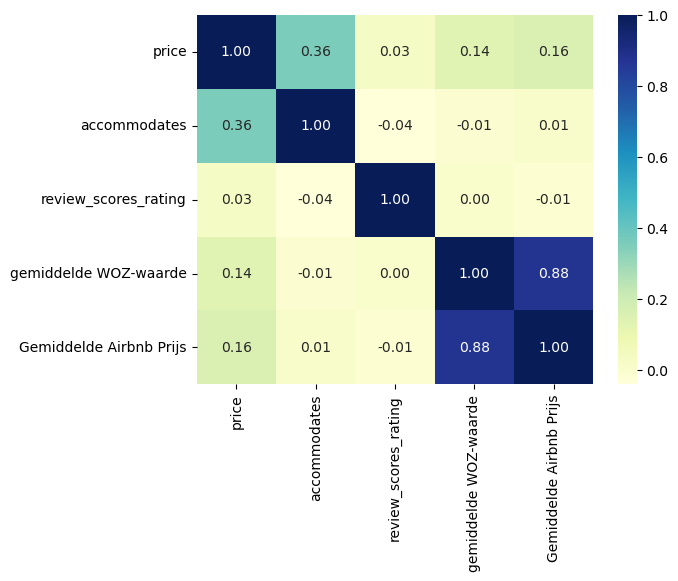

In [216]:
sns.heatmap(data=listings_corr.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")

<AxesSubplot: xlabel='accommodates', ylabel='Count'>

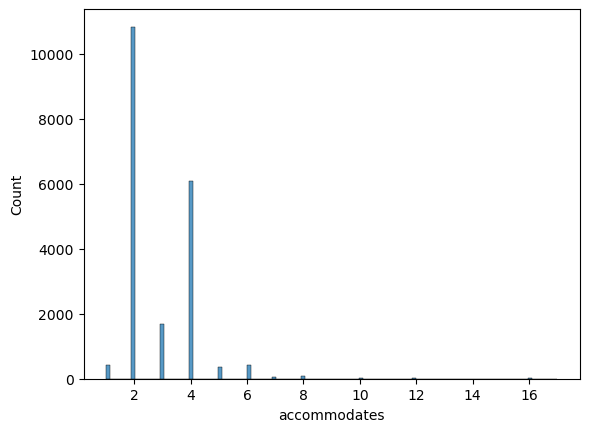

In [102]:
sns.histplot(data=listings_details_df, x='accommodates')

(array([1.1253e+04, 7.7720e+03, 3.7100e+02, 4.6500e+02, 9.4000e+01,
        2.1000e+01, 2.0000e+01, 0.0000e+00, 5.0000e+00, 2.9000e+01]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <BarContainer object of 10 artists>)

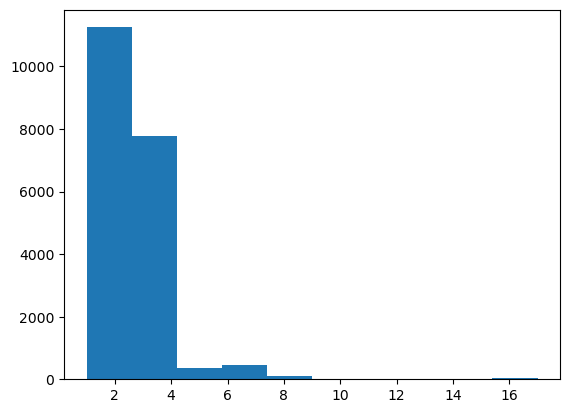

In [103]:
plt.hist(listings_details_df['accommodates'], bins=10)

In [219]:
import plotly.express as px
fig = px.histogram(listings_details_df, x="accommodates")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [106]:
personen = listings_details_df[['accommodates','price']]

In [108]:
personen.to_csv('personen.csv')

In [116]:
listings_details_df['price'] = listings_details_df['price'].str[1:]

In [117]:
listings_details_df['price'] = pd.to_numeric(listings_details_df['price'], errors='coerce')

In [121]:
Neighbourhood_price_df = pd.DataFrame(listings_df.groupby('neighbourhood')['price'].mean())

In [122]:
Neighbourhood_price_df.reset_index(inplace=True)

In [170]:
woz_df = woz_df.rename(columns={'Gemiddelde WOZ-waarde woningen naar stadsdeel, 1 januari 2022':'gebied','Unnamed: 1':'gemiddelde WOZ-waarde','Unnamed: 2':'gemiddelde WOZ-waarde per m2'})
woz_df = woz_df[2:9]

In [125]:
woz_df.reset_index(drop=True, inplace=True)

In [126]:
woz_df['gemiddelde Airbnb prijs'] = 0

In [127]:
woz_df['gemiddelde Airbnb prijs'][0] = Neighbourhood_price_df['price'][[4,5]].mean()
woz_df['gemiddelde Airbnb prijs'][1] = Neighbourhood_price_df['price'][[2,7,20]].mean()
woz_df['gemiddelde Airbnb prijs'][2] = Neighbourhood_price_df['price'][[6,10,15,18]].mean()
woz_df['gemiddelde Airbnb prijs'][3] = Neighbourhood_price_df['price'][[3,8,21]].mean()
woz_df['gemiddelde Airbnb prijs'][4] = Neighbourhood_price_df['price'][[11,14,17,19]].mean()
woz_df['gemiddelde Airbnb prijs'][5] = Neighbourhood_price_df['price'][[12,13,16]].mean()
woz_df['gemiddelde Airbnb prijs'][6] = Neighbourhood_price_df['price'][[0,1,9]].mean()

C:\Users\Tim Rentenaar\AppData\Local\Temp\ipykernel_12468\3761716007.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Tim Rentenaar\AppData\Local\Temp\ipykernel_12468\3761716007.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
woz_df['gemiddelde WOZ-waarde'] = pd.to_numeric(woz_df['gemiddelde WOZ-waarde'])

In [130]:
woz_df['gemiddelde WOZ-waarde'].dtype

dtype('int64')

In [131]:
woz_df.to_csv('woz.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Bijlmer-Centrum'),
  Text(1, 0, 'Bijlmer-Oost'),
  Text(2, 0, 'Bos en Lommer'),
  Text(3, 0, 'Buitenveldert - Zuidas'),
  Text(4, 0, 'Centrum-Oost'),
  Text(5, 0, 'Centrum-West'),
  Text(6, 0, 'De Aker - Nieuw Sloten'),
  Text(7, 0, 'De Baarsjes - Oud-West'),
  Text(8, 0, 'De Pijp - Rivierenbuurt'),
  Text(9, 0, 'Gaasperdam - Driemond'),
  Text(10, 0, 'Geuzenveld - Slotermeer'),
  Text(11, 0, 'IJburg - Zeeburgereiland'),
  Text(12, 0, 'Noord-Oost'),
  Text(13, 0, 'Noord-West'),
  Text(14, 0, 'Oostelijk Havengebied - Indische Buurt'),
  Text(15, 0, 'Osdorp'),
  Text(16, 0, 'Oud-Noord'),
  Text(17, 0, 'Oud-Oost'),
  Text(18, 0, 'Slotervaart'),
  Text(19, 0, 'Watergraafsmeer'),
  Text(20, 0, 'Westerpark'),
  Text(21, 0, 'Zuid')])

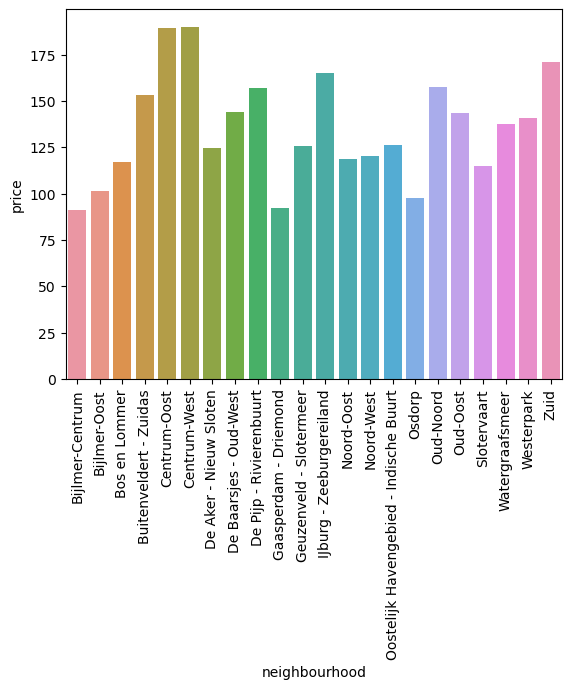

In [133]:
plt.figure()
ax = sns.barplot(data=Neighbourhood_price_df, x='neighbourhood', y='price')
plt.xticks(rotation=90)

In [134]:
neighbourhood_rating_merge = pd.merge(left=listings_df[['id','neighbourhood']], right=listings_details_df[['id','review_scores_rating']], on='id')

In [135]:
Neighbourhood_rating_df = pd.DataFrame(neighbourhood_rating_merge.groupby('neighbourhood')['review_scores_rating'].mean())

In [136]:
Neighbourhood_rating_df.reset_index(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Bijlmer-Centrum'),
  Text(1, 0, 'Bijlmer-Oost'),
  Text(2, 0, 'Bos en Lommer'),
  Text(3, 0, 'Buitenveldert - Zuidas'),
  Text(4, 0, 'Centrum-Oost'),
  Text(5, 0, 'Centrum-West'),
  Text(6, 0, 'De Aker - Nieuw Sloten'),
  Text(7, 0, 'De Baarsjes - Oud-West'),
  Text(8, 0, 'De Pijp - Rivierenbuurt'),
  Text(9, 0, 'Gaasperdam - Driemond'),
  Text(10, 0, 'Geuzenveld - Slotermeer'),
  Text(11, 0, 'IJburg - Zeeburgereiland'),
  Text(12, 0, 'Noord-Oost'),
  Text(13, 0, 'Noord-West'),
  Text(14, 0, 'Oostelijk Havengebied - Indische Buurt'),
  Text(15, 0, 'Osdorp'),
  Text(16, 0, 'Oud-Noord'),
  Text(17, 0, 'Oud-Oost'),
  Text(18, 0, 'Slotervaart'),
  Text(19, 0, 'Watergraafsmeer'),
  Text(20, 0, 'Westerpark'),
  Text(21, 0, 'Zuid')])

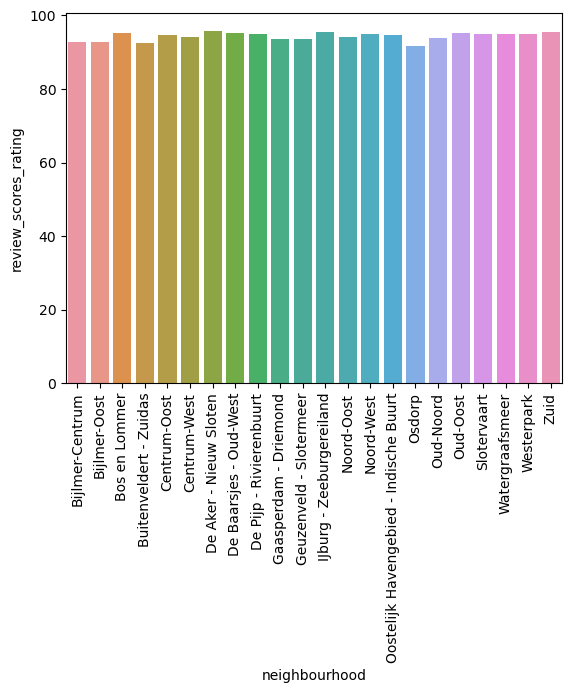

In [137]:
plt.figure()
ax = sns.barplot(data=Neighbourhood_rating_df, x='neighbourhood', y='review_scores_rating')
plt.xticks(rotation=90)

In [138]:
ratings_model = pd.read_csv('airBNB_ratingsmodel.csv')

In [140]:
ratings_model = ratings_model.drop('Unnamed: 0', axis=1)

In [142]:
ratings_model_melted = pd.melt(ratings_model[['positive','review_scores_rating']])

<AxesSubplot: xlabel='value', ylabel='variable'>

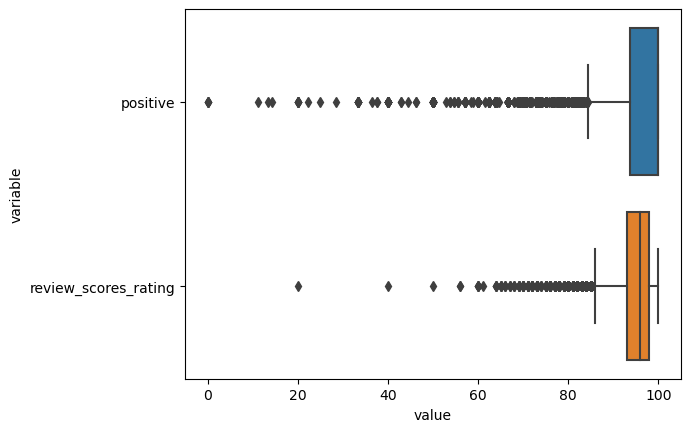

In [144]:
sns.boxplot(y='variable',x='value',data=ratings_model_melted)

<AxesSubplot: xlabel='positive', ylabel='review_scores_rating'>

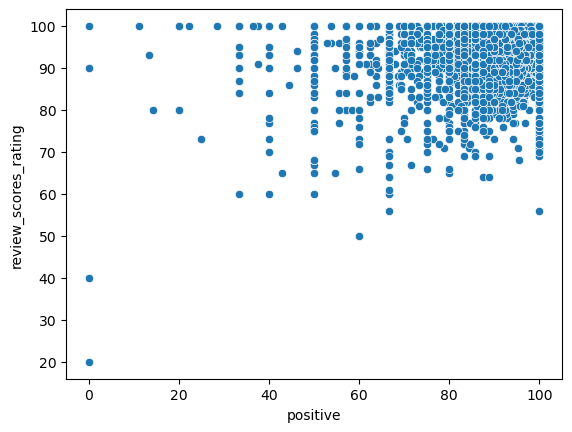

In [145]:
sns.scatterplot(data=ratings_model, x='positive', y='review_scores_rating')

In [146]:
ratings_model['positive'] = ratings_model['positive'].round(1)

In [148]:
ratings_model['positive'].corr(ratings_model['review_scores_rating'])

0.2578473726353505

[Text(0.5, 1.0, 'hoi'), Text(0.5, 0, 'sick'), Text(0, 0.5, 'yooo')]

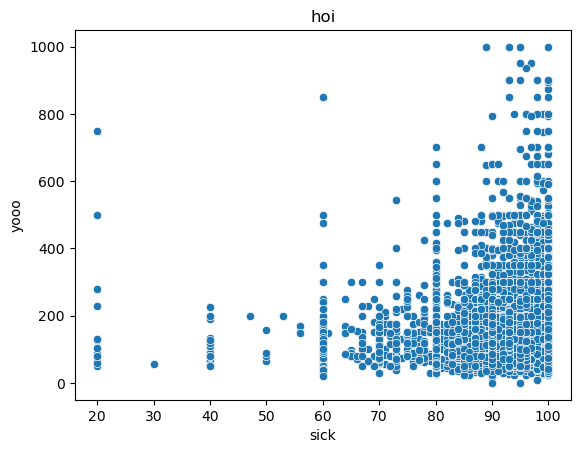

In [149]:
sns.scatterplot(data=listings_details_df, x='review_scores_rating', y='price').set(title='hoi', xlabel='sick', ylabel='yooo')

In [150]:
accuracy = pd.read_csv('AccuracyDF.csv')

In [155]:
accuracy_new = pd.merge(left=accuracy, right=listings_details_df[['id','price']], on='id', how='left')

<AxesSubplot: xlabel='positive', ylabel='price'>

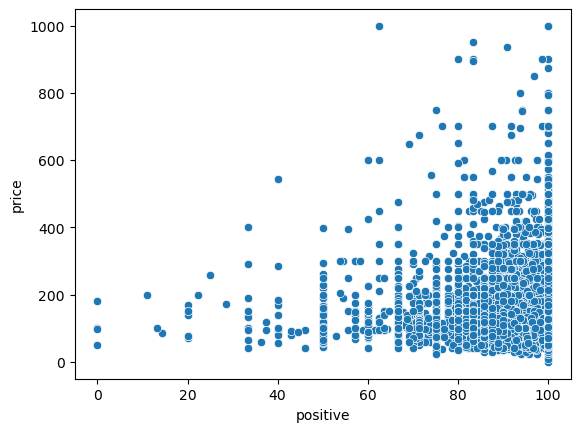

In [157]:
sns.scatterplot(data=accuracy_new, x='positive', y='price')

<AxesSubplot: xlabel='accuracy'>

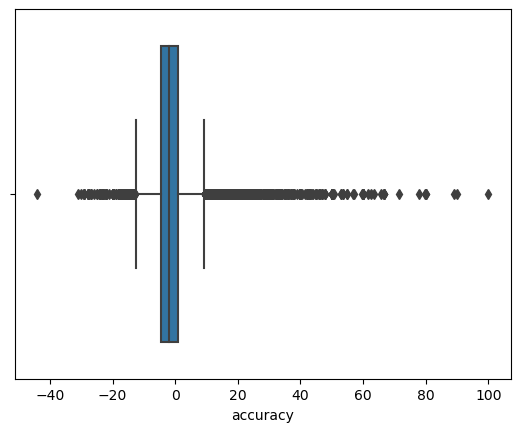

In [158]:
sns.boxplot(data=accuracy_new, x='accuracy')

<AxesSubplot: xlabel='review_scores_rating', ylabel='price'>

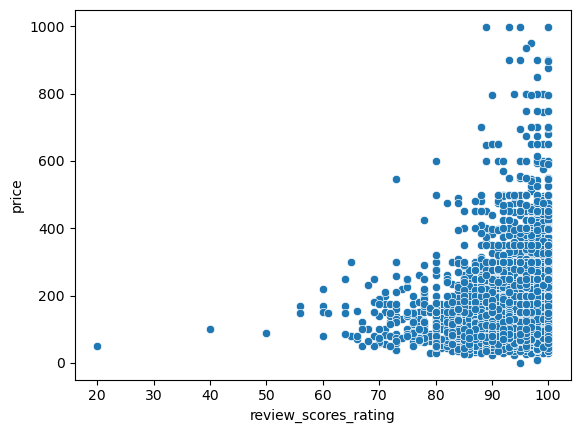

In [159]:
sns.scatterplot(data=accuracy_new, x='review_scores_rating', y='price')

In [160]:
listings_details_df['price'].max()

999.0

In [161]:
listings_df['price'].max()

8500

In [162]:
accuracy_new.to_csv('PriceRatingDF.csv')

In [163]:
reviews_details_head = reviews_details_df.head()

In [164]:
reviews_details_head.to_csv('reviews_details.csv')

In [ ]:
listings_details_df_new = listings_details_df_new.head()

In [ ]:
listings_details_df_new.columns

In [ ]:
listings_df.head()

In [ ]:
listings_df.columns

In [ ]:
listings_df.groupby('neighbourhood').availability_365.mean()

In [ ]:
print(type(price))

In [166]:
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,gebied
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44,M Oost
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47,E West
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198,A Centrum
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141,A Centrum
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199,A Centrum


In [194]:
listings_woz = pd.merge(left=listings_df[['id','neighbourhood','gebied']], right=woz_df[['gebied','gemiddelde WOZ-waarde']], on='gebied')

In [196]:
gemwoz = listings_woz.groupby('neighbourhood')['gemiddelde WOZ-waarde'].mean()

In [198]:
listings_woz.to_csv('listings_woz.csv')